# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [ ]:
!pip3 install pandas

### Importação de módulos e Arquivos

In [3]:
import pandas as pd

# importando e criando DataFrames
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servico_prestados_df = pd.read_excel('BaseServicosPrestados.xlsx')

# removendo campos não necessários para o cálculo das informações solicitadas
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)

display(funcionarios_df)
display(clientes_df)
display(servico_prestados_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### 1 - Valor total da folha salarial

In [4]:
# salario total de cada funcionario -> salario base + beneficios + impostos

funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Beneficios'] + funcionarios_df['Impostos'] + funcionarios_df['VT'] + funcionarios_df['VR']

display(funcionarios_df)

print(f'O salário total de todos os funcionários é de R$ {sum(funcionarios_df['Salario Total']):,.2f}')

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Salario Total
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística,19104.18
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,7875.92
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo,42616.32
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,9605.88


O salário total de todos os funcionários é de R$ 2,717,493.22


### 2 - Qual foi o faturamento da empresa?
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

In [5]:
# criando dataframe de faturamento
faturamento_empresa_df = servico_prestados_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']], on='ID Cliente')

display(faturamento_empresa_df)

faturamento_total = sum(faturamento_empresa_df['Tempo Total de Contrato (Meses)'] * faturamento_empresa_df['Valor Contrato Mensal'])
print(f'O faturamento total da empresa foi de R$ {faturamento_total:,.2f}')

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal
0,1,14,540
1,2,12,1260
2,4,14,2520
3,5,8,3510
4,6,8,2340
...,...,...,...
232,315,4,1575
233,316,8,3690
234,317,6,2385
235,319,14,4185


O faturamento total da empresa foi de R$ 5,519,160.00


### 3 - Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.
    . Na base de funcionários temos uma lista com todos os funcionários
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 

In [6]:
# display(funcionarios_df)
# display(servico_prestados_df)

# fazendo a listagem de funcionários com base no dataframe de serviços prestados e pegando somente os ID de cada funcionário
# de maneira única
qtde_funcionarios_fecharam_servico = len(servico_prestados_df['ID Funcionário'].unique())
# pegando a quantidade total de funcionários através do ID dos mesmos presente no dataframe de funcionarios
qtde_funcionarios_total = len(funcionarios_df['ID Funcionário'])

porcent_func_fecharam_contrato = qtde_funcionarios_fecharam_servico / qtde_funcionarios_total

print(f'A porcentagem de funcionários que já fechou algum contrato é de {porcent_func_fecharam_contrato:.2%}')


A porcentagem de funcionários que já fechou algum contrato é de 86.84%


### 4 - Calcule o total de contratos que cada área da empresa já fechou

<Axes: title={'center': 'Total de contratos fechados por área'}, xlabel='Area'>

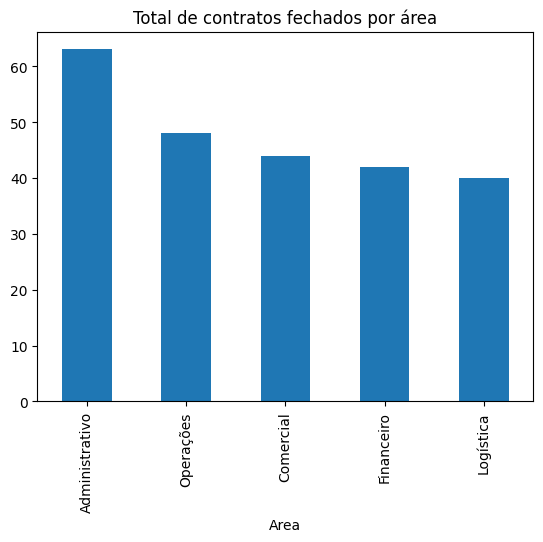

In [7]:
# display(funcionarios_df)
# display(servico_prestados_df)

contratos_area_df = servico_prestados_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
# retornando a frequencia com que cada area aparece no dataframe
quant_contratos_area = contratos_area_df['Area'].value_counts()

quant_contratos_area.plot(kind='bar', title='Total de contratos fechados por área')

### 5 - Calcule o total de funcionários por área

<Axes: title={'center': 'Total de funcionários por área'}, xlabel='Area'>

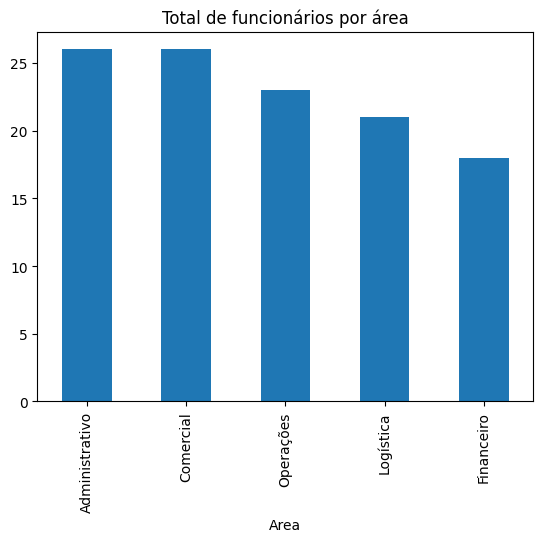

In [8]:
# display(funcionarios_df)
# display(servico_prestados_df)

quant_funcionarios_area = funcionarios_df['Area'].value_counts()

quant_funcionarios_area.plot(kind='bar', title='Total de funcionários por área')

### 6 - Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

In [10]:
# display(clientes_df)

ticket_medio_mensal = clientes_df['Valor Contrato Mensal'].mean()

print(f'O ticket médio mensal é de R$ {ticket_medio_mensal:,.2f}')

O ticket médio mensal é de R$ 2,502.56
